In [1]:
import  lib_Experimentum    as      Exp
from    Alessandria         import  *
from    Models              import  S_2_Generate, S_Dynamical_Form_Factor_2, S_Dynamical_Form_Factor_0, S_0_Generate

import pandas as pd
import  numpy               as      np
from    scipy.io            import  loadmat

from    matplotlib.pyplot   import  plot
import  matplotlib.pyplot   as      plt


import  time

now_path        =   '../BRILLOUIN/TDP43/ARS_11_02/'
spectra_filename    =   'ARS_11_02'
VIPA_filename       =   'ARS_11_02_VIPA_notsat.tif'

super_start         =   time.process_time()
tempo               =   ()

syg_kwargs          =   {'height': 10, 'distance': 20, 'width': 3.}
syg_kwargs_VIPA     =   {'distance':100, 'width': 1}
syg_kwargs_brill    =  {'height': 8., 'distance': 20, 'width': 3.}
VIPA_treshold       =   37

cols        = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_width', 'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_mark   = ('Co', 'Omega', 'Gamma', 'delta_width', 'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_real   = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_width', 'delta_amplitude','shift', 'offset')
cols_gauss  = ( 'A', 'mu', 'sigma')

ATTENZIONE funzione da aggiornare



ATTENZIONE guarda Get_VIPA_mat


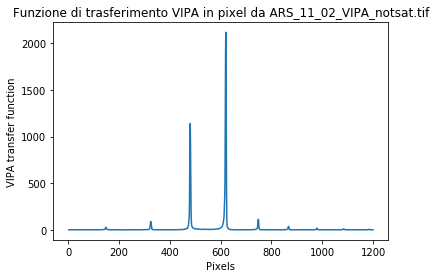

Spettro con Brillouin più alti
Lo spettro è brillouin_higher
Lo spettro ha 5 picchi


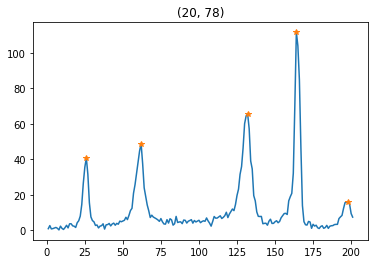

In [2]:
#0) importo dati e inizializzo oggetti
i   =   20
j   =   78
y    =   Import_from_Matlab(spectra_filename, now_path, var_name = 'y_all')[i][j]
Data    =   Exp.Spectrum(name = str((i,j)))
Data.Get_Spectrum(y = np.resize(y, np.max(y.shape)), offset = 183., cut = False, cut_range = (100, 680))
Data.Get_Spectrum_Peaks(**syg_kwargs)
Data.Get_VIPA_tif(VIPA_filename, now_path, fig = 'VIPA_img', save_path = now_path)

plt.figure()
plt.plot(Data.x, Data.y)
plt.plot(Data.x[Data.peaks[0]], Data.y[Data.peaks[0]], '*')
plt.title(str((i,j)))

check = Data.Check_Spectrum(saturation_width = 13.5)

if      check == 1  : nature    = 'saturo'
elif    check == 2  : nature    = 'brillouin_higher'
elif    check == 3  : nature    = 'invisible'
else:                 nature    = 'bono'
print('Lo spettro è '+nature)
print('Lo spettro ha {} picchi'.format(Data.n_peaks))

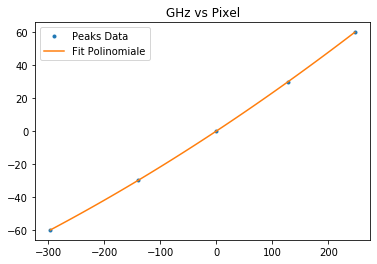

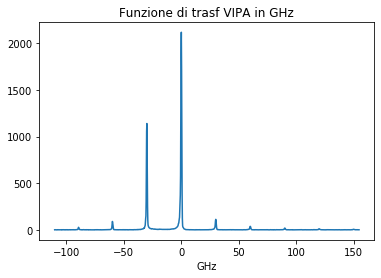

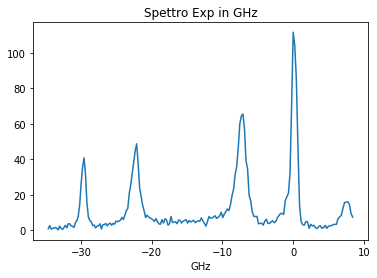



Ho stimato 12 parametri iniziali per il fit che andrai a fare

Co  = 1.000 

Omega  = 7.513 

Gamma  = 0.667 

Delta  = 0.667 

tau  = 10.000 

delta_width  = 0.500 

delta_amplitude  = 1.000 

A  =  nan 

mu  =  nan 

sigma  =  nan 

shift  = 0.000 

offset  = 11.214 

Ho stimato i parametri della gaussiana come A = 2558.67	mu  = -9.76	sigma = 15.89
E li ho aggiunti ai parametri iniziali per il fit. Ora conosco 12 parametri su 12 



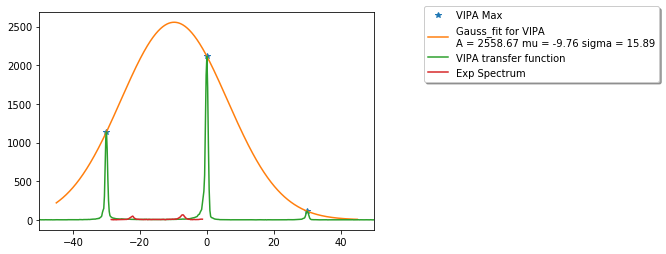

Text(0.5, 1.0, 'Spectrum ready for fit (20, 78)')

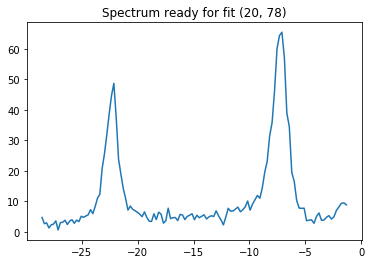

In [3]:
#1) Operazioni di modifica Spettro

Data.How_Many_Peaks_To_VIPA(treshold = VIPA_treshold, **syg_kwargs_VIPA)
Data.Fit_Pixel2GHz(fig = True)
Data.VIPA_Pix2GHz(fig = True)

if nature == 'brillouin_higher':

    Data.Spectrum_Pix2GHz(align = False)

Data.Spectrum_Pix2GHz(fig = True)

if nature == 'brillouin_higher':  

    Data.Get_Spectrum_Peaks(**syg_kwargs_brill)
    Data.Get_Spectrum_4_Peaks_by_Order()

    # se è Brillouin highest
    if Data.y[Data.peaks['peaks_idx'][2]] > Data.y[Data.peaks['peaks_idx'][3]]:
        print('ok è brillouin highst')
        Data.Align_Brillouin_Highest()
    
else:           

    Data.Get_Spectrum_4_Peaks_by_Height()


Data.Cut_n_Estimate_Spectrum(estimate = True, verbose = True, distanza = 0.25, columns = cols)
Data.Fit_VIPA_Gaussian(verbose = True, fig = True)
plt.figure()
plt.plot(Data.x_freq, Data.y)
plt.title('Spectrum ready for fit {}'.format(Data.name))

In [4]:
#Analyze_Peaks(Data.x_VIPA, Data.y_VIPA, 'pix', height = 37, distance = 100, width = 1., verbose = True, fig = True)

costo = 145608.87152966944
s impiegati a fare il fit  8.418515138 

costo dopo fit = 243.16619930773817
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.073985  7.372915  0.178475     0.241582         0.032797   
StdErrs   0.097525  0.035373  0.023383     1.558265         0.369571   
Initials  1.000000  7.679282  0.645441     0.500000         1.000000   

                     A         mu      sigma     shift     offset  
Values    2.305097e+03 -10.191377  14.303835 -0.167441   2.789238  
StdErrs   7.526700e+09  15.029274  22.937193  0.033694   0.358873  
Initials  2.558675e+03  -9.764477  15.891801  0.000000  10.863354  
Valore stimato della cost function prima del fit totale con fit markoviano:
243.16619930773817


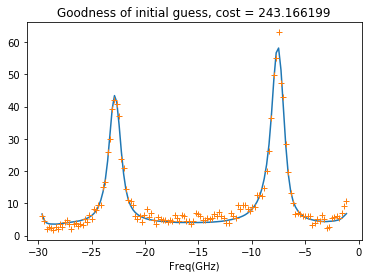

In [9]:
#3) fit markoviano
Data.Get_p0_by_Markov(Data.p0.values[0],treshold = 1000)
print(Data.Markov_Fit_Params)
Data.Take_A_Look_Before_Fitting()

Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.7771e+02                                    1.43e+03    
       1              2         2.5773e+02      4.20e+02       2.60e+00       3.16e+02    
       2              4         2.0270e+02      5.50e+01       5.36e-01       1.06e+02    
       3              5         1.8089e+02      2.18e+01       5.17e-01       1.02e+02    
       4              6         1.7172e+02      9.17e+00       1.06e+00       8.57e+01    
       5              7         1.6566e+02      6.06e+00       2.21e+00       1.95e+01    
       6              8         1.6392e+02      1.74e+00       2.31e+00       5.67e+01    
       7              9         1.6276e+02      1.15e+00       4.10e+00       2.86e+01    
       8             14         1.6271e+02      5.95e-02       1.33e-02       8.14e+01    
       9             15         1.6269e+02      1.50e-02       2.74e-03       2.59e-01    
  

1

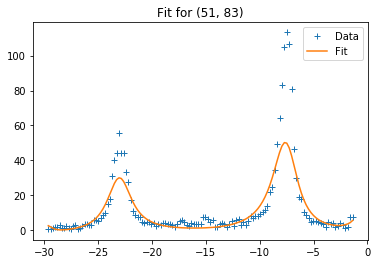

In [5]:
#4) fit totale
percents                    =   (0.2, 0.1, 0.1, 'positive', 'positive', 0.15, 0.15, np.inf, np.inf)
Data.Get_Fit_Bounds(percents, columns = cols_real)
p_gauss = Data.Markov_Fit_Params[list(cols_gauss)].values[0]
Data.Get_p0(Data.p0[list(cols_real)].values[0], cols_real)
Data.Non_Linear_Least_Squares(p_gauss, cols_real, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, fig = True, max_nfev = 2000)


In [7]:
Data.Tot_Fit_Params

,Co,Omega,Gamma,Delta,tau,delta_width,delta_amplitude,shift,offset
Values,0.049311,10.277979,0.590291,15.077847,0.449857,0.667409,0.061439,-0.039768,-0.901314
StdErrs,0.004460,1.063894,0.271342,6.410115,0.220538,0.028399,0.004329,0.027596,0.490659
Initials,0.061639,9.343628,0.655878,1.000000,7.063750,0.624191,0.064761,0.014195,-2.238643
